ZEE RECOMMENDER SYSTEMS

a. Recommender Engine

b. Collaborative Filtering (Item-based & User-based Approach)

c. Pearson Correlation

d. Nearest Neighbors using Cosine Similarity

e. Matrix Factorization

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
m= pd.read_fwf('zee-movies.dat', encoding='ISO-8859-1')
r= pd.read_fwf('zee-ratings.dat', encoding='ISO-8859-1')
u= pd.read_fwf('zee-users.dat', encoding='ISO-8859-1')

In [89]:
m

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN
...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,NaN,NaN
3879,3949::Requiem for a Dream (2000)::Drama,NaN,NaN
3880,3950::Tigerland (2000)::Drama,NaN,NaN
3881,3951::Two Family House (2000)::Drama,NaN,NaN


In [90]:
m.shape

(3883, 3)

Movie information is in the file "movies.dat" and is in the following format:

MovieID::Title::Genres

Titles are identical to titles provided by the IMDB (including year of release)

Genres are pipe-separated

In [91]:
u

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455
...,...
6035,6036::F::25::15::32603
6036,6037::F::45::1::76006
6037,6038::F::56::1::14706
6038,6039::F::45::0::01060


In [92]:
u.shape

(6040, 1)

User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is not checked for accuracy.
Only users who have provided some demographic information are included in this data set

In [93]:
r

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291
...,...
1000204,6040::1091::1::956716541
1000205,6040::1094::5::956704887
1000206,6040::562::5::956704746
1000207,6040::1096::4::956715648


In [94]:
r.shape

(1000209, 1)

All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

In [95]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Movie ID::Title::Genres  3883 non-null   object
 1   Unnamed: 1               100 non-null    object
 2   Unnamed: 2               51 non-null     object
dtypes: object(3)
memory usage: 91.1+ KB


In [96]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 1 columns):
 #   Column                              Non-Null Count    Dtype 
---  ------                              --------------    ----- 
 0   UserID::MovieID::Rating::Timestamp  1000209 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB


In [97]:
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   UserID::Gender::Age::Occupation::Zip-code  6040 non-null   object
dtypes: object(1)
memory usage: 47.3+ KB


In [98]:
r.isna().sum()
# m.isna().sum()
# u.isna().sum()

UserID::MovieID::Rating::Timestamp    0
dtype: int64

##Spliting & Cleaning the Dataset tables:

In [99]:
m.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [100]:
m["Movie ID::Title::Genres"].duplicated().sum()

0

In [101]:
m= pd.DataFrame(m["Movie ID::Title::Genres"])
m["Movie_ID"] = m['Movie ID::Title::Genres'].apply(lambda x: x.split("::")[0])
m["Title"] = m['Movie ID::Title::Genres'].apply(lambda x: x.split("::")[1])
m["Genres"] = m['Movie ID::Title::Genres'].apply(lambda x: x.split("::")[-1])
m.head(10)

,Movie ID::Title::Genres,Movie_ID,Title,Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy
5,6::Heat (1995)::Action|Crime|Thriller,6,Heat (1995),Action|Crime|Thriller
6,7::Sabrina (1995)::Comedy|Romance,7,Sabrina (1995),Comedy|Romance
7,8::Tom and Huck (1995)::Adventure|Children's,8,Tom and Huck (1995),Adventure|Children's
8,9::Sudden Death (1995)::Action,9,Sudden Death (1995),Action
9,10::GoldenEye (1995)::Action|Adventure|Thriller,10,GoldenEye (1995),Action|Adventure|Thriller


In [102]:
m.drop(columns=["Movie ID::Title::Genres"], inplace= True)

In [103]:
# Converting the type of Movie_ID type to integer
m= m.astype({"Movie_ID": int})
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie_ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


Method-I to get Year -
.str method is not suitable to get year:

m['Release_Year'] = m['Title'].str[-5:-1]

'1995', '1994', '1996', 'n th', '1976', '1993', '1992', '1988',
       '1967', '964)', '1977', 'der ', '1965', '(199', '1982', '1962',
       '1990', '1991', '1989', '1937', '1940', '1969', '1981', '1973',
       '1970', '1960', '1955', '1956', '1959', '1968', '1980', '1975',
       '1986', '995)', '1948', '1943', 'he B', '1950', '1946', '1987',
       '1997', ' Art', '1974', 'ns l', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1964', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', ') (1',
       '1927', '1929', ' (19', '1928', '1925', '1923', '1999', "e d'",
       'olar', '(196', '981)', '1919', '(198', 'nd) ', '2000', 'n) (',
       '1920', '1921', 'dron', 'e (1', '989)'], dtype=object

In [104]:
# m['Release_Year'] = m['Title'].str.extract(r'\((\d{4})\)')

In [105]:
'''m["Release_Year"].unique()
array(['1995', '1994', '1996', nan, '1976', '1993', '1992', '1988',
       '1967', '1964', '1977', '1965', '1982', '1962', '1990', '1991',
       '1989', '1937', '1940', '1969', '1981', '1973', '1970', '1960',
       '1955', '1956', '1959', '1968', '1980', '1975', '1986', '1948',
       '1943', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1963', '1942', '1941', '1953', '1939', '1947',
       '1945', '1938', '1935', '1936', '1926', '1932', '1930', '1971',
       '1979', '1966', '1978', '1985', '1983', '1984', '1931', '1922',
       '1927', '1929', '1928', '1925', '1923', '1999', '1919', '2000',
       '1920', '1921'], dtype=object)'''

'm["Release_Year"].unique()\narray([\'1995\', \'1994\', \'1996\', nan, \'1976\', \'1993\', \'1992\', \'1988\',\n       \'1967\', \'1964\', \'1977\', \'1965\', \'1982\', \'1962\', \'1990\', \'1991\',\n       \'1989\', \'1937\', \'1940\', \'1969\', \'1981\', \'1973\', \'1970\', \'1960\',\n       \'1955\', \'1956\', \'1959\', \'1968\', \'1980\', \'1975\', \'1986\', \'1948\',\n       \'1943\', \'1950\', \'1946\', \'1987\', \'1997\', \'1974\', \'1958\', \'1949\',\n       \'1972\', \'1998\', \'1933\', \'1952\', \'1951\', \'1957\', \'1961\', \'1954\',\n       \'1934\', \'1944\', \'1963\', \'1942\', \'1941\', \'1953\', \'1939\', \'1947\',\n       \'1945\', \'1938\', \'1935\', \'1936\', \'1926\', \'1932\', \'1930\', \'1971\',\n       \'1979\', \'1966\', \'1978\', \'1985\', \'1983\', \'1984\', \'1931\', \'1922\',\n       \'1927\', \'1929\', \'1928\', \'1925\', \'1923\', \'1999\', \'1919\', \'2000\',\n       \'1920\', \'1921\'], dtype=object)'

In [106]:
#creating new feature - "Release Year" using regex from title
import re
def get_year(i):
    if len(re.findall(r'\s\((\d{4})\)$', i)) == 1 :
        return re.findall(r'\s\((\d{4})\)$', i)[0]
    else: return '0'

m['Release_year'] = m['Title'].apply(get_year).astype('int')

In [107]:
# dropping rows with 0
m= m.loc[m["Release_year"]!=0]

In [108]:
m["Genres"].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [109]:
# Drop which have same Title and Genres (As observed above)
m = m.loc[m['Title'] != m['Genres']]

In [110]:
# Replacing incomplete words in Genre Columns
m['Genres'].replace({ 'Ac$' : 'Action', 'Act$' : 'Action','Acti$' : 'Action', 'Actio$' : 'Action',
                      'Ad$' : 'Adventure', 'Adv$' : 'Adventure', 'Advent$' : 'Adventure', 'Adventu$' : 'Adventure', 'Adventur$' : 'Adventure',
                      'Animati$' : 'Animation',
                      'Chi$' : 'Children', 'Chil$' : 'Children', 'Childr$' : 'Children', 'Childre$' : 'Children', "Children's" : "Children", "Children'": "Children",
                      'Com$' : 'Comedy', 'Come$' : 'Comedy', 'Comed$' : 'Comedy',
                      'Docu$' : 'Documentary', 'Documen$' : 'Documentary', 'Document$' : 'Documentary', 'Documenta$' : 'Documentary',
                      'Dr$' : 'Drama', 'Dram$' : 'Drama',
                      'Fant$' : 'Fantasy', 'Fantas$' : 'Fantasy',
                      'Horr$' : 'Horror', 'Horro$' : 'Horror',
                      'Music$' : 'Musical', 'Musical$' : 'Musical',
                      'Ro$' : 'Romance', 'Rom$' : 'Romance', 'Roma$' : 'Romance', 'Roman$' : 'Romance',
                      'Sci$' : 'SciFi', 'Sci-$' : 'SciFi', 'Sci-F$' : 'SciFi',
                      'Thri$' : 'Thriller', 'Thrille$' : 'Thriller',
                      'Wa$' : 'War',
                      'We$' : 'Western', 'Wester$' : 'Western',
                      'Film-Noir': 'FilmNoir'}, regex=True, inplace = True)
m['Genres'] = m['Genres'].str.lower()

In [111]:
m

,Movie_ID,Title,Genres,Release_year
0,1,Toy Story (1995),animation|children|comedy,1995
1,2,Jumanji (1995),adventure|children|fantasy,1995
2,3,Grumpier Old Men (1995),comedy|romance,1995
3,4,Waiting to Exhale (1995),comedy|drama,1995
4,5,Father of the Bride Part II (1995),comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),comedy,2000
3879,3949,Requiem for a Dream (2000),drama,2000
3880,3950,Tigerland (2000),drama,2000
3881,3951,Two Family House (2000),drama,2000


In [112]:
# Cleaning Rating and User dataset
r= pd.DataFrame(r["UserID::MovieID::Rating::Timestamp"])
r["UserID"] = r['UserID::MovieID::Rating::Timestamp'].apply(lambda x: x.split("::")[0]).astype('int')
r["MovieID"] = r['UserID::MovieID::Rating::Timestamp'].apply(lambda x: x.split("::")[1]).astype('int')
r["Rating"] = r['UserID::MovieID::Rating::Timestamp'].apply(lambda x: x.split("::")[2]).astype('int')
r["Timestamp"] = r['UserID::MovieID::Rating::Timestamp'].apply(lambda x: x.split("::")[-1])
r.head(10)

,UserID::MovieID::Rating::Timestamp,UserID,MovieID,Rating,Timestamp
0,1::1193::5::978300760,1,1193,5,978300760
1,1::661::3::978302109,1,661,3,978302109
2,1::914::3::978301968,1,914,3,978301968
3,1::3408::4::978300275,1,3408,4,978300275
4,1::2355::5::978824291,1,2355,5,978824291
5,1::1197::3::978302268,1,1197,3,978302268
6,1::1287::5::978302039,1,1287,5,978302039
7,1::2804::5::978300719,1,2804,5,978300719
8,1::594::4::978302268,1,594,4,978302268
9,1::919::4::978301368,1,919,4,978301368


In [113]:
r.drop(columns=["UserID::MovieID::Rating::Timestamp"], inplace= True)
#creating new column to convert timestamp to datetime format
r['Timestamp'] = pd.to_datetime(r['Timestamp'], unit='s')
r

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:16
1,1,661,3,2000-12-31 22:34:40
2,1,914,3,2000-12-31 22:32:32
3,1,3408,4,2000-12-31 22:04:48
4,1,2355,5,2001-01-06 23:38:40
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:44
1000205,6040,1094,5,2000-04-25 23:21:36
1000206,6040,562,5,2000-04-25 23:19:28
1000207,6040,1096,4,2000-04-26 02:20:48


In [114]:
u= pd.DataFrame(u["UserID::Gender::Age::Occupation::Zip-code"])
u["UserID"] = u["UserID::Gender::Age::Occupation::Zip-code"].apply(lambda x: x.split("::")[0]).astype('int')
u["Gender"] = u['UserID::Gender::Age::Occupation::Zip-code'].apply(lambda x: x.split("::")[1])
u["Age"] = u['UserID::Gender::Age::Occupation::Zip-code'].apply(lambda x: x.split("::")[2]).astype('int')
u["Occupation"] = u['UserID::Gender::Age::Occupation::Zip-code'].apply(lambda x: x.split("::")[3])
u["Zip-code"] = u['UserID::Gender::Age::Occupation::Zip-code'].apply(lambda x: x.split("::")[-1])
u.drop(columns=["UserID::Gender::Age::Occupation::Zip-code"], inplace= True)
u.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [115]:
u= u.astype({"Occupation": int})

In [116]:
# Convert categorical column to numerical col.
u["Gender"] = u["Gender"].map({"M":1, "F":0}).astype("int")
u

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455
...,...,...,...,...,...
6035,6036,0,25,15,32603
6036,6037,0,45,1,76006
6037,6038,0,56,1,14706
6038,6039,0,45,0,01060


In [117]:
# Convertion from .dat to .csv
m.to_csv("m.csv")
r.to_csv("r.csv")
u.to_csv("u.csv")

## EDA (Exploratory Data Analysis)

In [32]:
m["Release_year"].value_counts()

Release_year
1996    344
1995    340
1998    333
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: count, Length: 81, dtype: int64

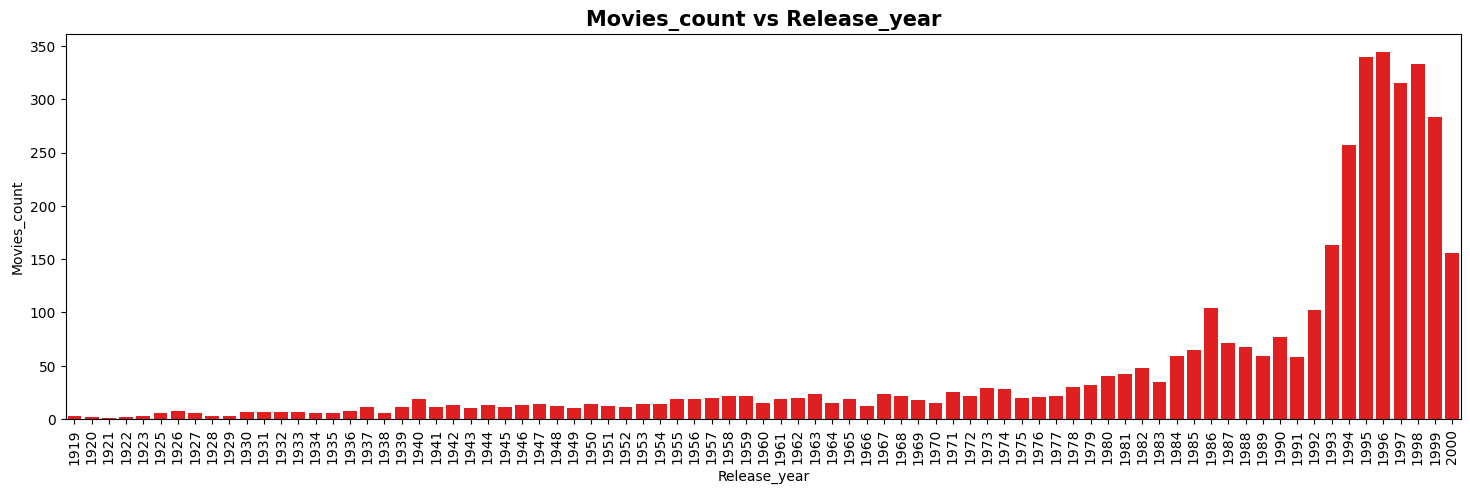

In [33]:
plt.figure(figsize=(18,5))
sns.barplot(x=m['Release_year'].value_counts().index, y=m['Release_year'].value_counts().values, color= "Red")
plt.xticks(rotation=90)
plt.xlabel('Release_year')
plt.ylabel('Movies_count')
plt.title('Movies_count vs Release_year', fontsize = 15, fontweight = 'bold')
plt.show()

In [34]:
# For Movie count in Genres- we have to separate Genres
m_genres= m.copy(deep=True)
m_genres

,Movie_ID,Title,Genres,Release_year
0,1,Toy Story (1995),animation|children|comedy,1995
1,2,Jumanji (1995),adventure|children|fantasy,1995
2,3,Grumpier Old Men (1995),comedy|romance,1995
3,4,Waiting to Exhale (1995),comedy|drama,1995
4,5,Father of the Bride Part II (1995),comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),comedy,2000
3879,3949,Requiem for a Dream (2000),drama,2000
3880,3950,Tigerland (2000),drama,2000
3881,3951,Two Family House (2000),drama,2000


In [35]:
m_genres['Genres']= m_genres['Genres'].str.split('|')
m_genres

,Movie_ID,Title,Genres,Release_year
0,1,Toy Story (1995),"[animation, children, comedy]",1995
1,2,Jumanji (1995),"[adventure, children, fantasy]",1995
2,3,Grumpier Old Men (1995),"[comedy, romance]",1995
3,4,Waiting to Exhale (1995),"[comedy, drama]",1995
4,5,Father of the Bride Part II (1995),[comedy],1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),[comedy],2000
3879,3949,Requiem for a Dream (2000),[drama],2000
3880,3950,Tigerland (2000),[drama],2000
3881,3951,Two Family House (2000),[drama],2000


In [36]:
m_genres= m_genres.explode("Genres")
m_genres.head()

,Movie_ID,Title,Genres,Release_year
0,1,Toy Story (1995),animation,1995
0,1,Toy Story (1995),children,1995
0,1,Toy Story (1995),comedy,1995
1,2,Jumanji (1995),adventure,1995
1,2,Jumanji (1995),children,1995


In [37]:
m_genres.groupby("Genres")["Title"].count().sort_values(ascending=False)

Genres
drama          1582
comedy         1188
action          501
thriller        486
romance         461
horror          340
adventure       282
sci-fi          256
children        249
crime           210
war             139
documentary     124
musical         113
mystery         105
animation       104
western          68
fantasy          62
filmnoir         44
                  8
scifi             7
d                 3
s                 2
a                 2
th                2
r                 1
f                 1
Name: Title, dtype: int64

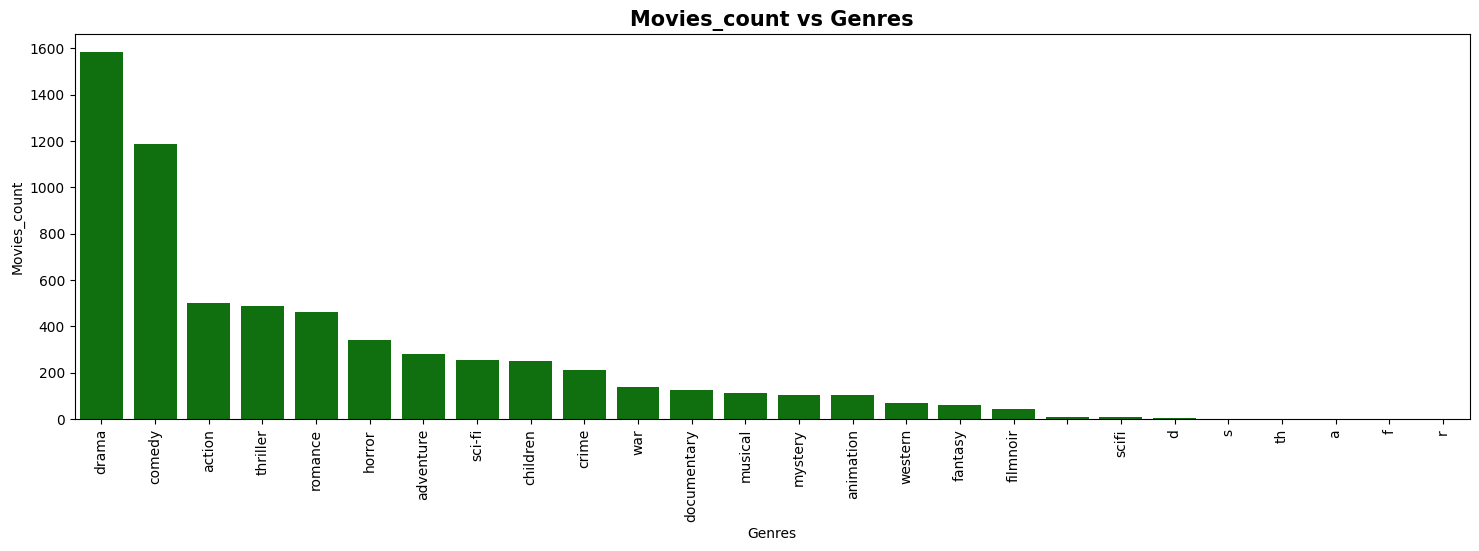

In [38]:
plt.figure(figsize=(18,5))
sns.barplot(x=m_genres['Genres'].value_counts().index, y=m_genres['Genres'].value_counts().values, color= "Green")
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Movies_count')
plt.title('Movies_count vs Genres', fontsize = 15, fontweight = 'bold')
plt.show()

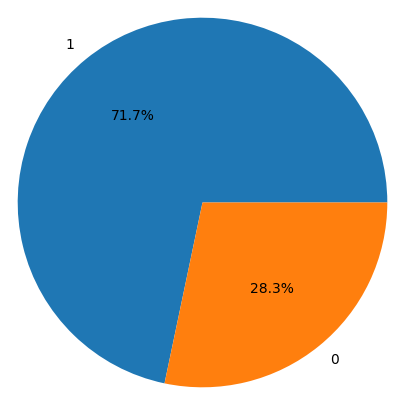

In [39]:
plt.figure(figsize=(15,5))
x = u["Gender"].value_counts().values
y = u["Gender"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%')
plt.show()

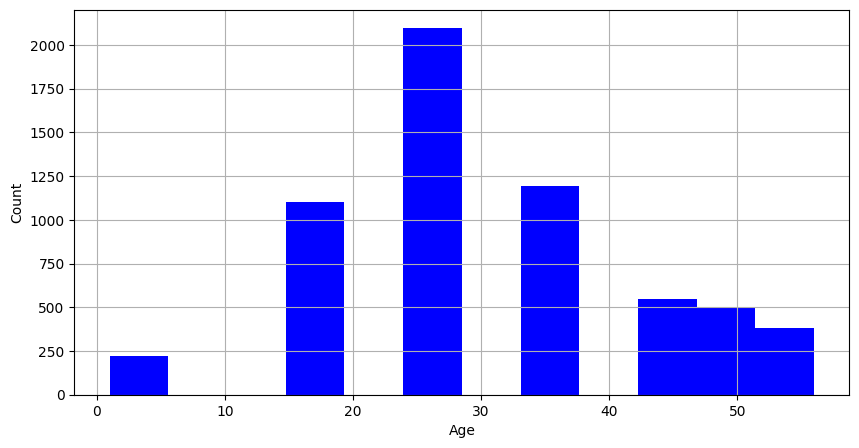

In [40]:
u["Age"].hist(figsize=(10,5),color="blue", bins=12)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

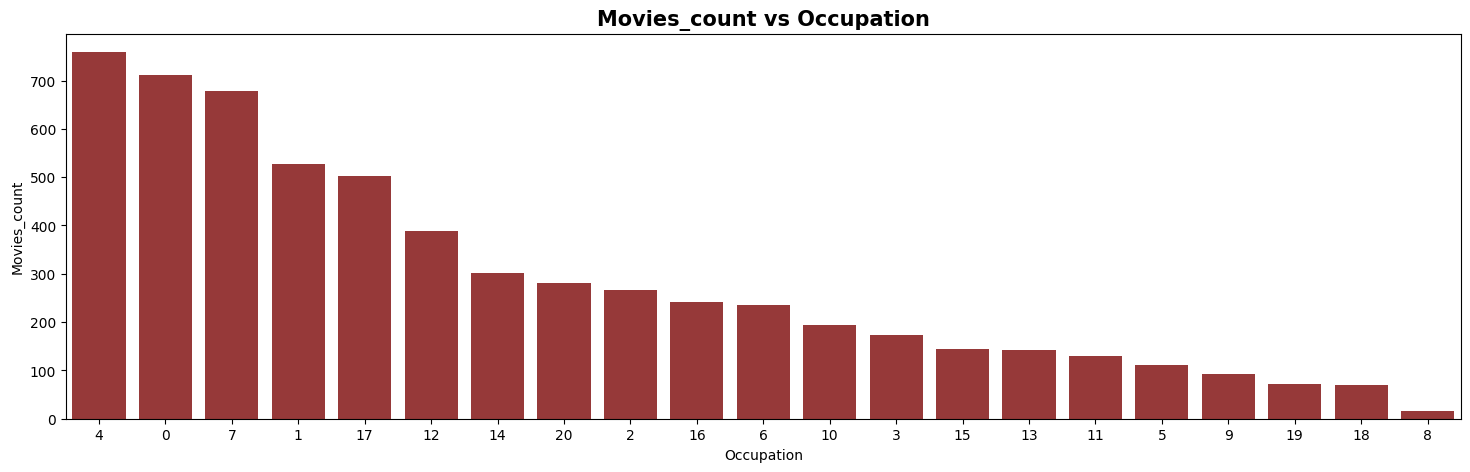

In [41]:
plt.figure(figsize=(18,5))
sns.barplot(x=u['Occupation'].value_counts().index, y=u['Occupation'].value_counts().values, color= "Brown", order=u['Occupation'].value_counts().index)
plt.xlabel('Occupation')
plt.ylabel('Movies_count')
plt.title('Movies_count vs Occupation', fontsize = 15, fontweight = 'bold')
plt.show()

In [42]:
r["Timestamp"].min(), r["Timestamp"].max()

(Timestamp('2000-04-25 23:05:36'), Timestamp('2003-02-28 17:49:52'))

In [43]:
#Avg rating of movies
r["Avg_rating"]= r.groupby("MovieID")["Rating"].mean().sort_values(ascending=False)
r.loc[r["MovieID"]==1]
#It gives wrong result

,UserID,MovieID,Rating,Timestamp,Avg_rating
40,1,1,5,2001-01-06 23:37:36,3.933333
469,6,1,4,2000-12-31 04:29:52,2.956522
581,8,1,4,2000-12-31 03:31:12,4.049645
711,9,1,5,2000-12-31 01:25:20,2.500000
837,10,1,5,2000-12-31 01:34:56,3.477064
...,...,...,...,...,...
997248,6022,1,5,2000-04-26 13:29:36,NaN
997541,6025,1,5,2000-04-27 05:21:04,NaN
998170,6032,1,4,2000-04-26 03:02:24,NaN
998360,6035,1,4,2000-04-26 01:33:52,NaN


In [44]:
r.drop(columns=["Avg_rating"], inplace= True)
r

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:16
1,1,661,3,2000-12-31 22:34:40
2,1,914,3,2000-12-31 22:32:32
3,1,3408,4,2000-12-31 22:04:48
4,1,2355,5,2001-01-06 23:38:40
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:44
1000205,6040,1094,5,2000-04-25 23:21:36
1000206,6040,562,5,2000-04-25 23:19:28
1000207,6040,1096,4,2000-04-26 02:20:48


In [45]:
m.rename(columns={'Movie_ID': 'MovieID'}, inplace=True)

## Merging the tables and Recommend the movies

In [46]:
# Form single data frame as dataset contain UserID and MovieID as intermediate columns.
df= pd.merge(r,m, how= "inner", on= "MovieID")
df= pd.merge(df,u, how="inner", on= "UserID")
df

,UserID,MovieID,Rating,Timestamp,Title,Genres,Release_year,Gender,Age,Occupation,Zip-code
0,1,1193,5,2000-12-31 22:12:16,One Flew Over the Cuckoo's Nest (1975),drama,1975,0,1,10,48067
1,1,661,3,2000-12-31 22:34:40,James and the Giant Peach (1996),animation|children|musical,1996,0,1,10,48067
2,1,914,3,2000-12-31 22:32:32,My Fair Lady (1964),musical|romance,1964,0,1,10,48067
3,1,3408,4,2000-12-31 22:04:48,Erin Brockovich (2000),drama,2000,0,1,10,48067
4,1,2355,5,2001-01-06 23:38:40,"Bug's Life, A (1998)",animation|children|comedy,1998,0,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...
996139,4211,3791,2,2000-08-03 16:11:44,Footloose (1984),drama,1984,1,45,5,77662
996140,4211,3806,3,2000-08-03 16:12:48,MacKenna's Gold (1969),western,1969,1,45,5,77662
996141,4211,3840,4,2000-08-03 16:12:48,Pumpkinhead (1988),horror,1988,1,45,5,77662
996142,4211,3766,2,2000-08-03 16:12:48,Missing in Action (1984),action|war,1984,1,45,5,77662


In [47]:
df.to_csv("df.csv")

In [48]:
# to remove all types of data from the description table except numbers.
df.describe(include=np.number).round(3).T

,count,mean,std,min,25%,50%,75%,max
UserID,996144.0,3024.003,1728.265,1.0,1505.0,3069.0,4476.0,6040.0
MovieID,996144.0,1867.030,1096.029,1.0,1032.0,1836.0,2770.0,3952.0
Rating,996144.0,3.580,1.117,1.0,3.0,4.0,4.0,5.0
Release_year,996144.0,1986.758,14.314,1919.0,1982.0,1992.0,1997.0,2000.0
Gender,996144.0,0.753,0.431,0.0,1.0,1.0,1.0,1.0
Age,996144.0,29.726,11.749,1.0,25.0,25.0,35.0,56.0
Occupation,996144.0,8.035,6.531,0.0,2.0,7.0,14.0,20.0


In [49]:
df_p_r = pd.pivot_table(df, index = 'Title', values='Rating', aggfunc = ['count','min','max','mean']).round(3)
df_p_r.columns = ['_'.join(col).strip() for col in df_p_r.columns.values]
df_p_r.sort_values(by =['count_Rating', 'mean_Rating'], ascending=False, inplace = True)

In [50]:
df_p_r.head(20)
# Important thing is the number of count of movie rating and its Avg_rating bcoz any single time watched movie could be 5 star rated.

,count_Rating,min_Rating,max_Rating,mean_Rating
Title,,,,
American Beauty (1999),3428,1,5,4.317
Star Wars: Episode IV - A New Hope (1977),2991,1,5,4.454
Star Wars: Episode V - The Empire Strikes Back (1980),2990,1,5,4.293
Star Wars: Episode VI - Return of the Jedi (1983),2883,1,5,4.023
Jurassic Park (1993),2672,1,5,3.764
Saving Private Ryan (1998),2653,1,5,4.337
Terminator 2: Judgment Day (1991),2649,1,5,4.059
"Matrix, The (1999)",2590,1,5,4.316
Back to the Future (1985),2583,1,5,3.990


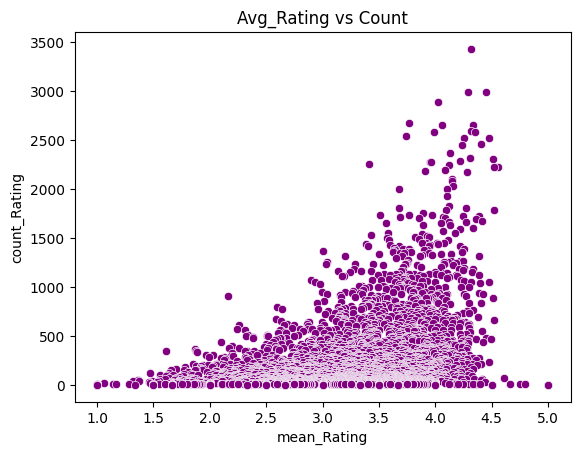

In [51]:
sns.scatterplot(y="count_Rating", x="mean_Rating", data=df_p_r, color="purple")
plt.title("Avg_Rating vs Count")
plt.show()

## Movie and User Matrix

In [52]:
"""pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean',
fill_value=None(Value to replace missing values with), margins=False, dropna=True(Do not include columns whose entries are all NaN), margins_name='All',
observed=_NoDefault.no_default, sort=True)"""
df_movie = pd.pivot_table(data=df, index = 'UserID', columns='Title', values='Rating', fill_value=0)
df_movie.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_movie.shape

(6040, 3682)

In [54]:
# Movie-Movie Similarity Matrix
n = 30 # 30 top rated movies
top_movies = df_p_r.head(n).index
df_movie_sample = df_movie.loc[:,df_movie.columns.isin(top_movies)]

In [55]:
print(f'Shape of Movie-Movie Similarity Matrix : {df_movie_sample.corr().shape}')

Shape of Movie-Movie Similarity Matrix : (30, 30)


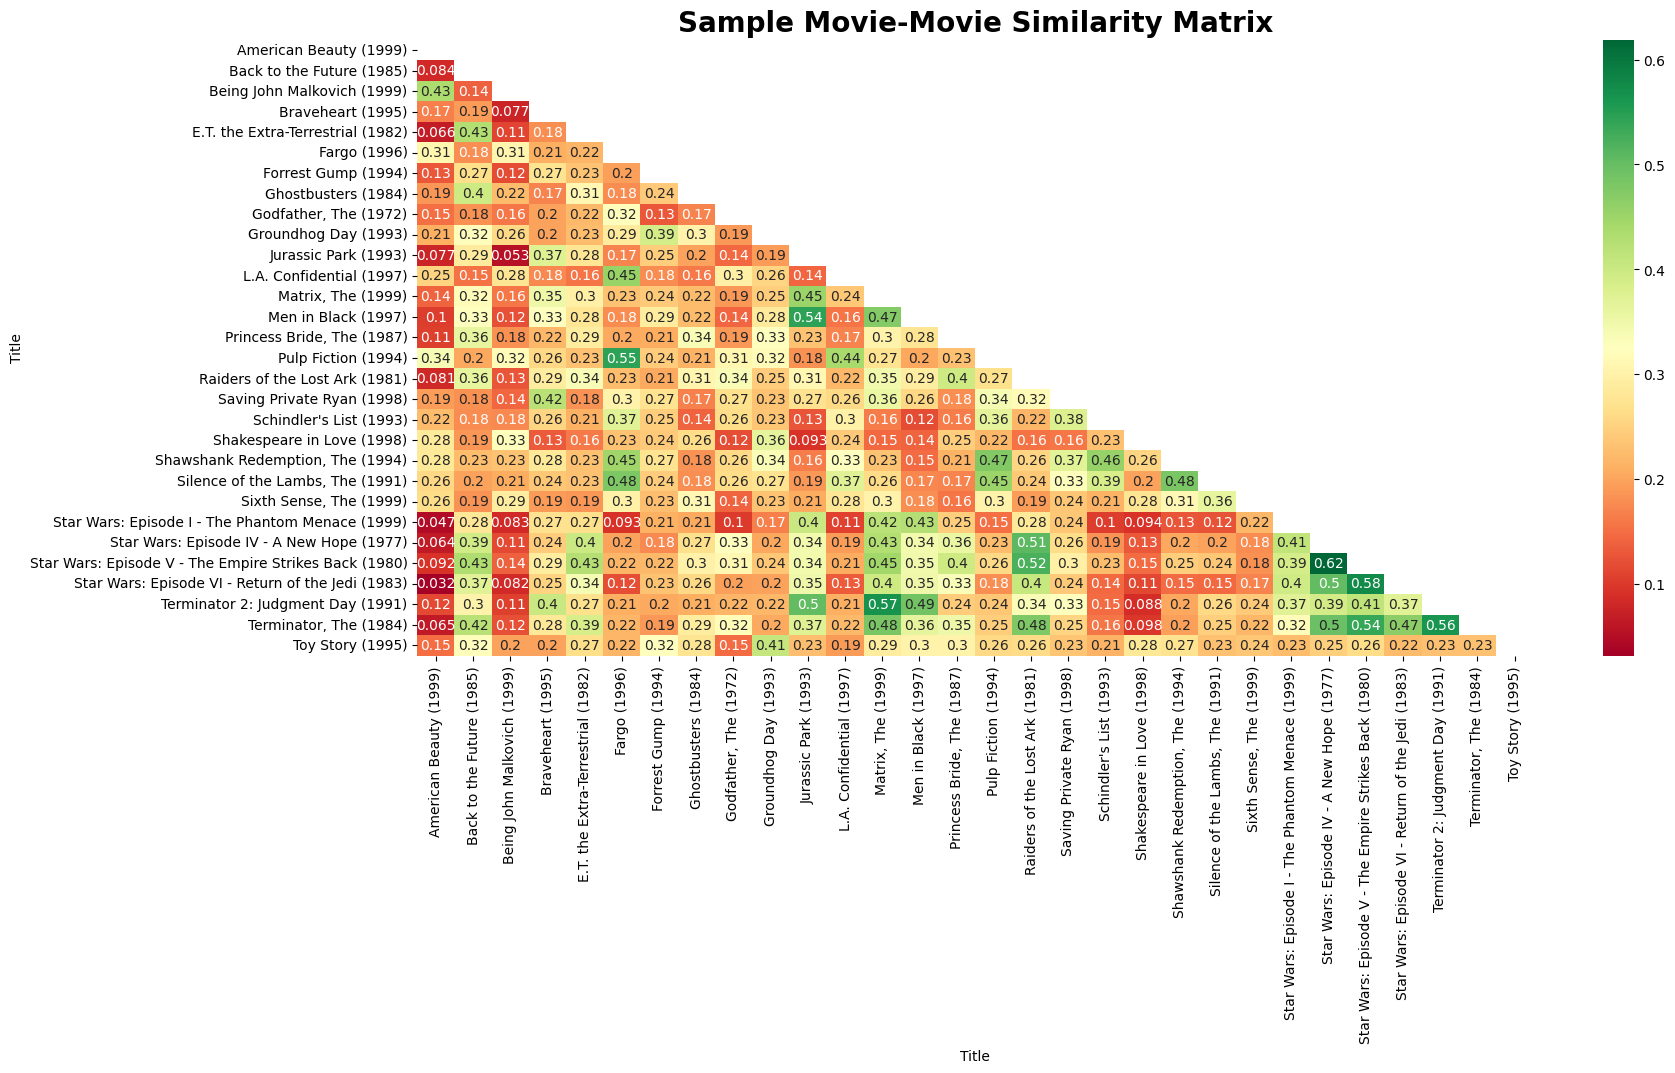

'from matplotlib import colormaps\nlist(colormaps)'

In [56]:
plt.figure(figsize=(18,8))
mask = np.triu(df_movie_sample.corr())
plt.title('Sample Movie-Movie Similarity Matrix', fontsize = 20, fontweight = 'bold')
sns.heatmap(df_movie_sample.corr(), annot = True, cmap = 'RdYlGn',  mask = mask)
plt.show()
"""from matplotlib import colormaps
list(colormaps)"""

In [57]:
# User-User Similarity Matrix/ Random Users
n = 30
sample_users = u.UserID.sample(n)
sample_users = sample_users.values
user_matrix_sample = df_movie.loc[df_movie.index.isin(sample_users)]
user_matrix_sample = user_matrix_sample.T

Shape of User-User Similarity Matrix : (30, 30)
--------------------------------------------------------------------------------


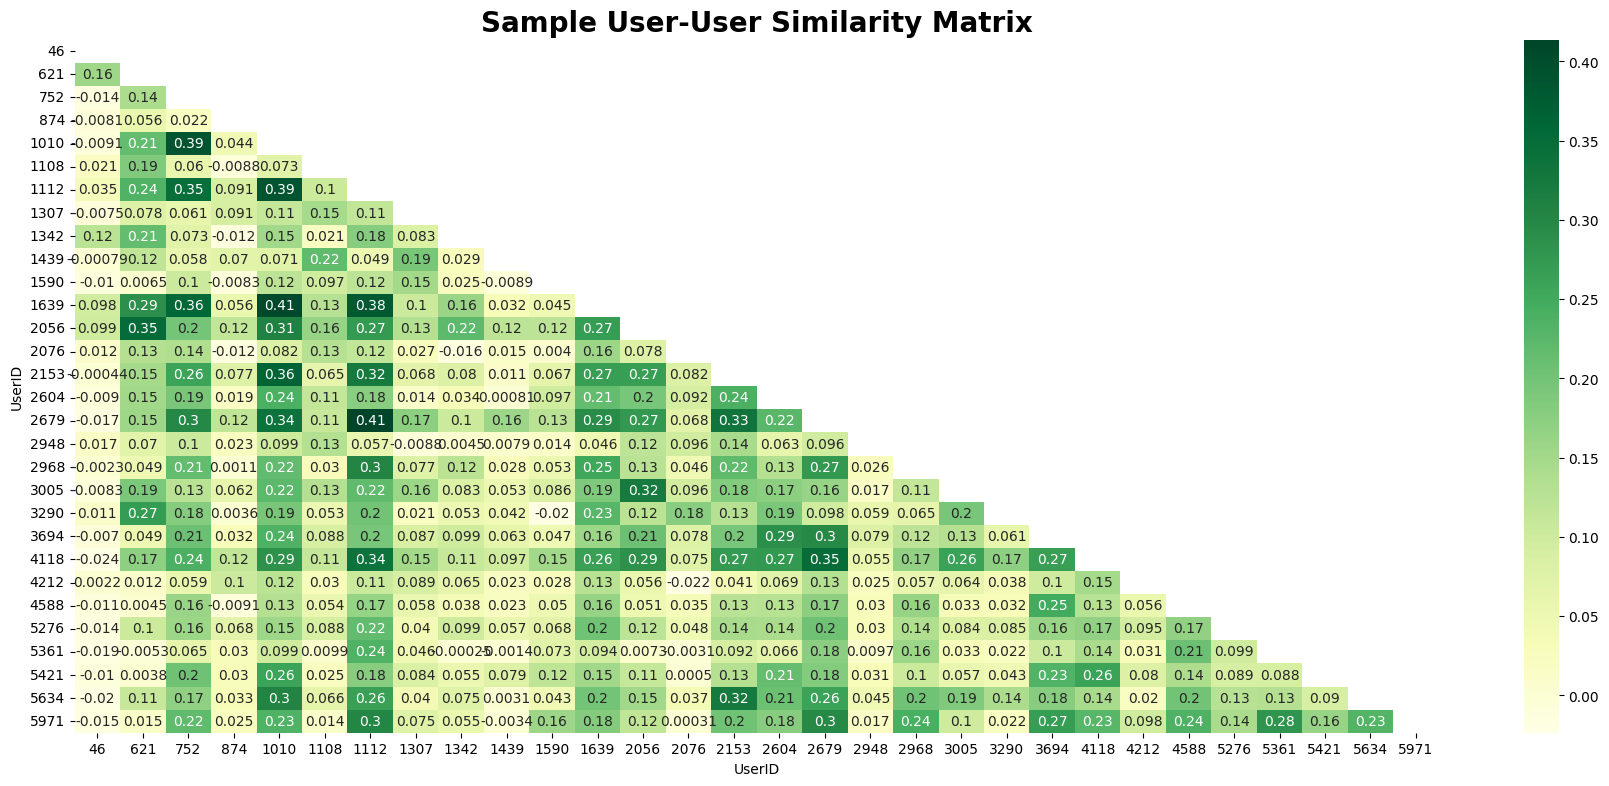

In [58]:
print(f'Shape of User-User Similarity Matrix : {user_matrix_sample.corr().shape}')
print('-'*80)
plt.figure(figsize=(22,9))
plt.title('Sample User-User Similarity Matrix', fontsize = 20, fontweight = 'bold')
mask = np.triu(user_matrix_sample.corr())
sns.heatmap(user_matrix_sample.corr(), annot = True, mask = mask, cmap = 'YlGn')
plt.show()

## Models- Pearson Corr, KNN, Matrix Multiplications

In [59]:
#Pearson correlation Function for Movie Recommender system:

def recommender_1(movie, df_movie, df_p_r, n_reccomend = 5):
    movie_rating = df_movie[movie] # movie=movie name
    similar_movies = df_movie.corrwith(movie_rating)
    corr_mov = pd.DataFrame(similar_movies,columns=['Correlation'])
    corr_mov.dropna(inplace=True)
    corr_mov = corr_mov.join(df_p_r['count_Rating'])
    recommended_movies = corr_mov[corr_mov['count_Rating']>100].sort_values('Correlation',ascending=False).head(n_reccomend+1)
    print(f'Top {n_reccomend} Recommended Movies to "{movie}" are as follow:')
    print('-'*100)
    for mov in recommended_movies.index:
        if mov != movie : print(mov)
    return None

In [60]:
# Testing
movie= "Shawshank Redemption, The (1994)"
recommender_1(movie, df_movie, df_p_r, n_reccomend = 10)

Top 10 Recommended Movies to "Shawshank Redemption, The (1994)" are as follow:
----------------------------------------------------------------------------------------------------
Silence of the Lambs, The (1991)
Good Will Hunting (1997)
Pulp Fiction (1994)
Schindler's List (1993)
Fargo (1996)
GoodFellas (1990)
Usual Suspects, The (1995)
Sling Blade (1996)
Jerry Maguire (1996)
Few Good Men, A (1992)


In [61]:
# For top rated movies in df_p_r list
movie= df_p_r.head(5).index
for mov in movie:
    recommender_1(mov, df_movie, df_p_r, n_reccomend = 5)

Top 5 Recommended Movies to "American Beauty (1999)" are as follow:
----------------------------------------------------------------------------------------------------
Being John Malkovich (1999)
Election (1999)
Pulp Fiction (1994)
Fight Club (1999)
Clerks (1994)
Top 5 Recommended Movies to "Star Wars: Episode IV - A New Hope (1977)" are as follow:
----------------------------------------------------------------------------------------------------
Star Wars: Episode V - The Empire Strikes Back (1980)
Raiders of the Lost Ark (1981)
Star Wars: Episode VI - Return of the Jedi (1983)
Terminator, The (1984)
Alien (1979)
Top 5 Recommended Movies to "Star Wars: Episode V - The Empire Strikes Back (1980)" are as follow:
----------------------------------------------------------------------------------------------------
Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode VI - Return of the Jedi (1983)
Terminator, The (1984)
Raiders of the Lost Ark (1981)
Aliens (1986)
Top 5 Recommende

In [62]:
#Cosine Similarity and KNN Function for Movie Recommender system:
from sklearn.neighbors import NearestNeighbors
def recommender_2(movie, df_movie, df_p_r, n_reccomend = 5):
    nn_recomender = NearestNeighbors(metric='cosine')
    nn_recomender.fit(df_movie.T)
    distance,neighbors = nn_recomender.kneighbors([df_movie.loc[:,movie]],n_neighbors=n_reccomend+1)
    recommended_movies = [df_movie.T.iloc[i].name for i in neighbors[0]]
    print(f'Top {n_reccomend} Recommended Movies to "{movie}" are as follow:')
    print('-'*100)
    for mov in recommended_movies:
        if mov != movie : print(mov)
    print('-'*100)
    return None

In [63]:
movie= df_p_r.head(5).index
for mov in movie:
    recommender_2(mov, df_movie, df_p_r, n_reccomend = 5)

Top 5 Recommended Movies to "American Beauty (1999)" are as follow:
----------------------------------------------------------------------------------------------------
Being John Malkovich (1999)
Fargo (1996)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Shakespeare in Love (1998)
----------------------------------------------------------------------------------------------------
Top 5 Recommended Movies to "Star Wars: Episode IV - A New Hope (1977)" are as follow:
----------------------------------------------------------------------------------------------------
Star Wars: Episode V - The Empire Strikes Back (1980)
Star Wars: Episode VI - Return of the Jedi (1983)
Raiders of the Lost Ark (1981)
Terminator, The (1984)
Alien (1979)
----------------------------------------------------------------------------------------------------
Top 5 Recommended Movies to "Star Wars: Episode V - The Empire Strikes Back (1980)" are as follow:
--------------------------------------------------

In [64]:
# Matrix Factorization
!pip install scikit-surprise
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357238 sha256=e2fd7d9ebbe96b3cbd936e0ef30ad5069a5ab972bd58d4fcbfed044dbd3fbf07
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [65]:
d = 4
reader = Reader(rating_scale = (1, 5))
svd = SVD(random_state=23, n_factors=d, n_epochs=10, verbose=True)

data_svd = Dataset.load_from_df(df[['UserID', 'MovieID', 'Rating']], reader)
results = cross_validate(svd, data_svd, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9115  0.9095  0.9090  0.9100  0.0011  
MAE (testset)     0.7218  0.7208  0.7202  0.7209  0.0007  
Fit time          6.98    4.55    3.98    5.17    1.30    
Test time         10.93   4.08    7.65    7.56    2.80    


In [66]:
#splitting our data into trainset and testset
!pip install recommenders
from recommenders.datasets.python_splitters import python_random_split
train, test = python_random_split(df[['UserID', 'MovieID', 'Rating']], 0.75)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.0/356.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.7/750.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.8/919.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.9

In [67]:
print(train.shape)
print(test.shape)

(747108, 3)
(249036, 3)


In [68]:
test.head(3)

,UserID,MovieID,Rating
575967,3982,2424,4
872991,5809,3476,2
466994,926,3483,4


In [69]:
#'reader' is being used to get rating scale (for data, the scale is [1, 5]).
reader = Reader(rating_scale = (1, 5))

#Surprise needs to build an internal model of the data. We here use the load_from_df method to build a Dataset object
train_set = Dataset.load_from_df(train, reader=reader).build_full_trainset()
train_set

In [70]:
#Fitting the Model using SVD algorithm

from recommenders.utils.timer import Timer
svd1 = SVD(random_state=23, n_factors=4, n_epochs=10, verbose=True)

with Timer() as train_time:
    svd1.fit(train_set)

print("Took {} seconds for training.".format(train_time.interval))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Took 8.949599511999622 seconds for training.


In [71]:
#Creating predictions after fitting the model

from recommenders.models.surprise.surprise_utils import predict
predictions = predict(svd1, test, usercol='UserID', itemcol='MovieID')
predictions.head()

,UserID,MovieID,prediction
0,3982,2424,3.199803
1,5809,3476,3.456357
2,926,3483,3.597207
3,3391,3525,3.502993
4,3578,2021,3.061932


In [72]:
# Merging the Predictions with Actual Ratings and plotting to visualize the results
check_predictions = test.merge(predictions, how='left', left_on=['UserID','MovieID'], right_on = ['UserID','MovieID'])

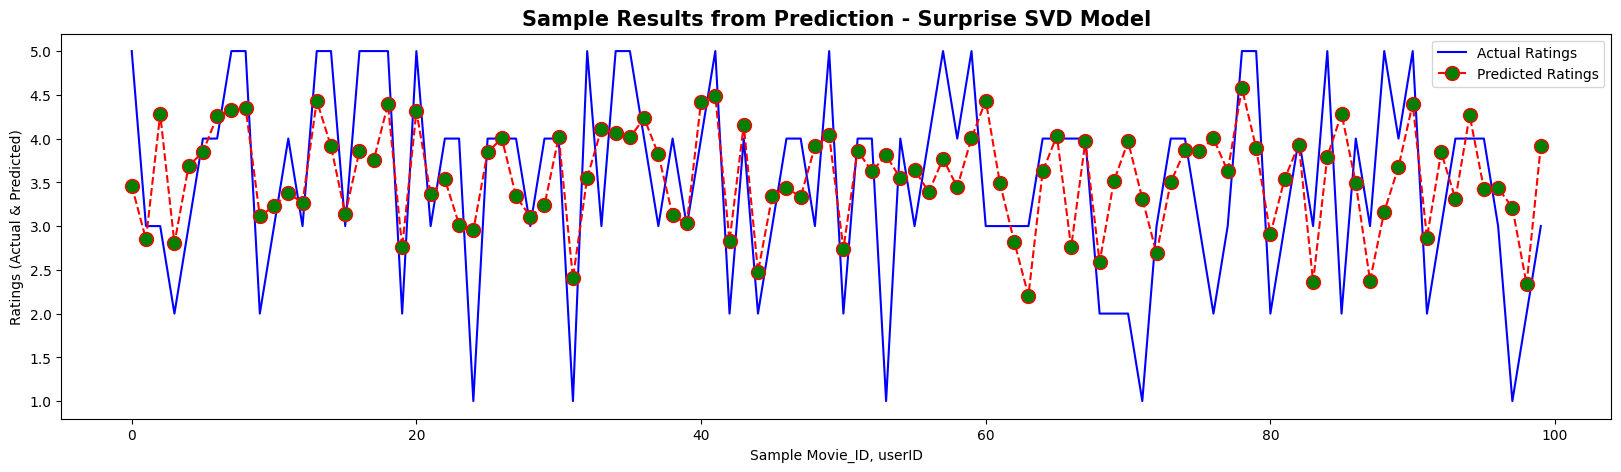

In [73]:
plt.figure(figsize=(20,5))
d = 100
x = range(d)
initial_pointer = np.random.randint(100)
final_pointer = initial_pointer+d

y1 = check_predictions.loc[range(initial_pointer,final_pointer),'Rating']
y2 = check_predictions.loc[range(initial_pointer,final_pointer),'prediction']

plt.plot(x, y1, label = 'Actual Ratings', color='blue')
plt.plot(x, y2, label = 'Predicted Ratings', color='red', linestyle='dashed', marker='o',markerfacecolor='green', markersize=10)

plt.ylabel('Ratings (Actual & Predicted)')
plt.xlabel('Sample Movie_ID, userID')
plt.title('Sample Results from Prediction - Surprise SVD Model', fontsize = 15, fontweight = 'bold')
plt.legend()
plt.show()

1. Users of which age group have watched and rated the most number of movies?

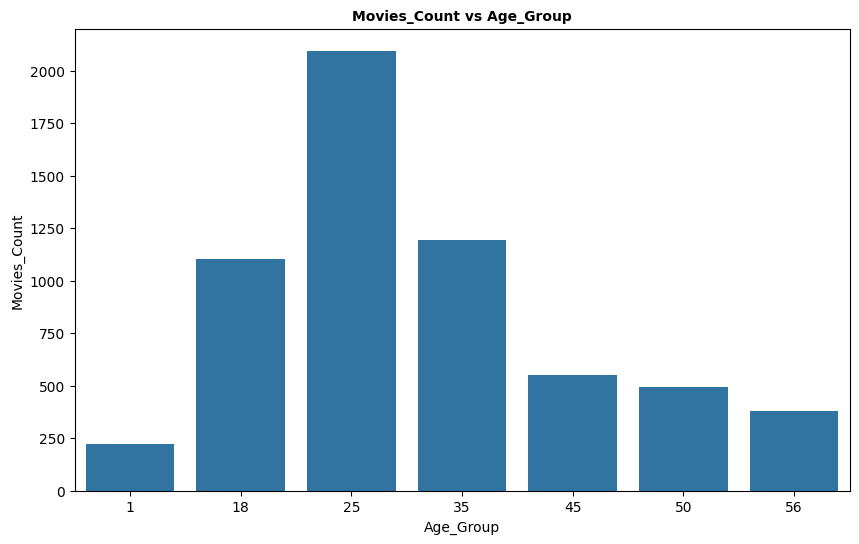

In [78]:
plt.figure(figsize=(10,6))
x = u["Age"].value_counts().sort_index().index
y = u["Age"].value_counts().sort_index().values
sns.barplot(x=x, y=y)
plt.xlabel('Age_Group')
plt.ylabel('Movies_Count')
plt.title('Movies_Count vs Age_Group', fontsize = 10, fontweight = 'bold')
plt.show()
# Group-Age with maximum Movie-Count is 25 to 34 followed by 35 to 44.

2. Users belonging to which profession have watched and rated the most movies?

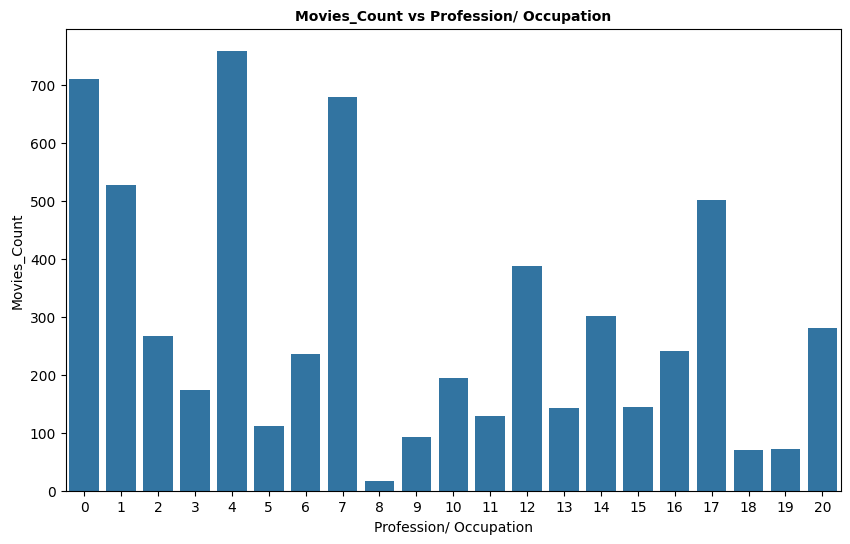

In [79]:
plt.figure(figsize=(10,6))
x = u["Occupation"].value_counts().sort_index().index
y = u["Occupation"].value_counts().sort_index().values
sns.barplot(x=x, y=y)
plt.xlabel('Profession/ Occupation')
plt.ylabel('Movies_Count')
plt.title('Movies_Count vs Profession/ Occupation', fontsize = 10, fontweight = 'bold')
plt.show()
# Profession/ Occupation with maximum Movie-Count is 4: College/grad student followed by 0:others and 7:executive/managerial.

3.Most of the users in our dataset who’ve rated the movies are Male. (T/F)

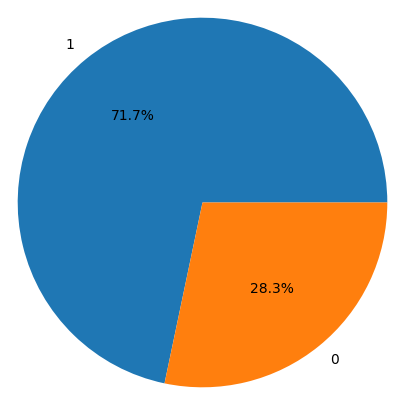

In [82]:
plt.figure(figsize=(15,5))
x = u["Gender"].value_counts().values
y = u["Gender"].value_counts().index
plt.pie(x, labels = y, center=(0, 0), radius=1.2, autopct='%1.1f%%')
plt.show()
# 71.7% is given by MALE while remaining 28.3% is given by FEMALE

4. Most of the movies present in our dataset were released in which decade?

  a.70s b.90s c.50s d.80s

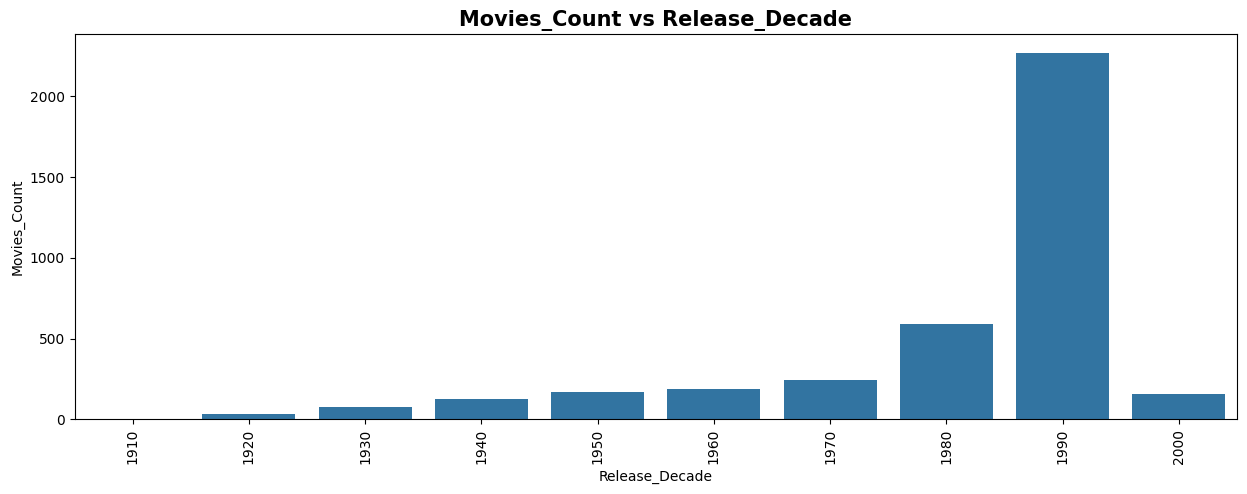

In [120]:
plt.figure(figsize=(15,5))
sns.barplot(x=m.groupby((m.Release_year//10)*10)['Movie_ID'].count().index, y=m.groupby((m.Release_year//10)*10)['Movie_ID'].count().values)
plt.xticks(rotation=90)
plt.xlabel('Release_Decade')
plt.ylabel('Movies_Count')
plt.title('Movies_Count vs Release_Decade', fontsize = 15, fontweight = 'bold')
plt.show()
# Most of the movies present in our dataset were released in Decade 90s (1990)

5. The movie with maximum no. of ratings is ___.

In [121]:
df_p_r.head(5)
# Most rated movies

,count_Rating,min_Rating,max_Rating,mean_Rating
Title,,,,
American Beauty (1999),3428,1,5,4.317
Star Wars: Episode IV - A New Hope (1977),2991,1,5,4.454
Star Wars: Episode V - The Empire Strikes Back (1980),2990,1,5,4.293
Star Wars: Episode VI - Return of the Jedi (1983),2883,1,5,4.023
Jurassic Park (1993),2672,1,5,3.764


6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [128]:
movie= "Liar Liar (1997)"
recommender_1(movie, df_movie, df_p_r, n_reccomend = 3)
recommender_2(movie, df_movie, df_p_r, n_reccomend = 3)

Top 3 Recommended Movies to "Liar Liar (1997)" are as follow:
----------------------------------------------------------------------------------------------------
Mrs. Doubtfire (1993)
Dumb & Dumber (1994)
Ace Ventura: Pet Detective (1994)
Top 3 Recommended Movies to "Liar Liar (1997)" are as follow:
----------------------------------------------------------------------------------------------------
Mrs. Doubtfire (1993)
Ace Ventura: Pet Detective (1994)
Dumb & Dumber (1994)
----------------------------------------------------------------------------------------------------


7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

**a. User Based- Similarity between target User and rest Users.
b. Item Based- Similarity between target Item and rest items (Here movies).**

8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

Pearson Correlation ranges between -1 to 1.

Cosine Similarity belongs to the interval between 0 and 1.

9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
Model Performance 3 Folds CV: Mean **RMSE = 0.91** and Mean **MAE = 0.72**

10. Give the sparse ‘row’ matrix representation for the following dense matrix -

  [[1 0]

  [3 7]]